In [ ]:
!nvidia-smi

Thu Jun 15 02:28:28 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   50C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Installing Depencies

In [ ]:
!pip install -U sentence-transformers
!pip install pyLDAvis
!pip install nlpaug

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 4.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 63.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 77.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 114.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 39.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=fbe95e6a62decb02b19f661b4c113deaa51ce8fcac7a397fd6562bc67f8a644e
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers
Looking in indexes: https://pypi.org/simple, https://

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 15.7 MB/s eta 0:00:00


In [ ]:
!pip install -Uqqq pip --progress-bar off
!pip install -qqq bitsandbytes==0.39.0 --progress-bar off
!pip install -qqq torch==2.0.1 --progress-bar off

!pip install -U git+https://github.com/huggingface/transformers.git
!pip install -U git+https://github.com/huggingface/accelerate.git
!pip install -qqq -U git+https://github.com/huggingface/peft.git

!pip install xformers

!pip install -qqq datasets==2.12.0 --progress-bar off
!pip install -qqq loralib==0.1.1 --progress-bar off
!pip install -qqq einops==0.6 --progress-bar off
!pip install zstandard
!pip install -U neptune

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-6peql0yd
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-6peql0yd
  Resolved https://github.com/huggingface/transformers.git to commit 1609a436eca115853b5a4cfd80b9ec2302bb9fcc
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.31.0.dev0-py3-none-any.whl size=7191894 sha256=26f59bce8e2f280915c830be857f215f8a30a897d825045222e749ef13731cbc
  Stored in directory: /tmp/pip-ephem-wheel-cache-fqo0d0yk/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.30.2
    Uninstalling t

In [ ]:
# import locale
# print(locale.getpreferredencoding())

# def getpreferredencoding(do_setlocale = True):
#     return "UTF-8"
# locale.getpreferredencoding = getpreferredencoding

ANSI_X3.4-1968


# Importing Libraries

In [ ]:
import json
import os
from pprint import pprint

import bitsandbytes as bnb
import pandas as pd
import numpy as np

import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize


import torch
from torch import nn

import transformers
from datasets import load_dataset
from huggingface_hub import notebook_login
from peft import (
    LoraConfig, PeftConfig, PeftModel,
    get_peft_model, prepare_model_for_kbit_training
    )

from transformers import (
    AutoConfig,
    AutoModelForCausalLM,
    AutoTokenizer,
    BitsAndBytesConfig,
)

import gc
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

nltk.download('punkt')
nltk.download("stopwords")
nltk.download('wordnet')
os.environ[ "CUDA VISIBLE DEVICES"] = "O"


===================================BUG REPORT===================================
Welcome to bitsandbytes. For bug reports, please run

python -m bitsandbytes

 and submit this information together with your error trace to: https://github.com/TimDettmers/bitsandbytes/issues
bin /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so
CUDA_SETUP: WARNING! libcudart.so not found in any environmental path. Searching in backup paths...
CUDA SETUP: CUDA runtime path found: /usr/local/cuda/lib64/libcudart.so
CUDA SETUP: Highest compute capability among GPUs detected: 7.5
CUDA SETUP: Detected CUDA version 118
CUDA SETUP: Loading binary /usr/local/lib/python3.10/dist-packages/bitsandbytes/libbitsandbytes_cuda118.so...


/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: /usr/lib64-nvidia did not contain ['libcudart.so', 'libcudart.so.11.0', 'libcudart.so.12.0'] as expected! Searching further paths...
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('8013'), PosixPath('//172.28.0.1'), PosixPath('http')}
  warn(msg)
/usr/local/lib/python3.10/dist-packages/bitsandbytes/cuda_setup/main.py:149: UserWarning: WARNING: The following directories listed in your path were found to be non-existent: {PosixPath('--logtostderr --listen_host=172.28.0.12 --

# Data Engineering

In [ ]:
from datasets import load_dataset

dataset = load_dataset("EleutherAI/pile", "pubmed")

Generating train split: 0 examples [00:00, ? examples/s]

Dataset pile downloaded and prepared to /root/.cache/huggingface/datasets/EleutherAI___pile/pubmed/0.0.0/ebea56d358e91cf4d37b0fde361d563bed1472fbd8221a21b38fc8bb4ba554fb. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
dataset['train'].to_csv('train_pubmed.csv')

Creating CSV from Arrow format:   0%|          | 0/15519 [00:00<?, ?ba/s]

21349165356

In [ ]:
train = pd.read_csv("train_pubmed.csv", nrows=300000)
print(f"size: {len(train)}")
train.head()

size: 300000


,text,meta
0,Epidemiology of hypoxaemia in children with ac...,"{'pmid': 11409574, 'language': 'eng'}"
1,Clinical signs of hypoxaemia in children with ...,"{'pmid': 11409575, 'language': 'eng'}"
2,Hypoxaemia in children with severe pneumonia i...,"{'pmid': 11409576, 'language': 'eng'}"
3,Oxygen concentrators and cylinders.\nA compari...,"{'pmid': 11409577, 'language': 'eng'}"
4,Oxygen supply in rural africa: a personal expe...,"{'pmid': 11409578, 'language': 'eng'}"


In [ ]:
sample_pubmed = train.sample(frac=1, random_state=23)
print(f"sample size: {len(sample_pubmed)}")

sample size: 300000


In [ ]:
sample_pubmed = sample_pubmed[["text"]]
sample_pubmed.head()

,text
201496,The orthogonal character of stationary phases ...
56070,Comparative performance of an adaptive directi...
290576,Reliability and concurrent validity of a Smart...
125756,Activation of the cation channel TRPM3 in peri...
75495,[Preoperative low-dose-rate versus high-dose-r...


In [ ]:
icd_10 = pd.read_csv("/content/ICD10-13.csv")
icd_10.head()

,labels,notes,code,paraphrase
0,Arthropathies,The patient presents with severe arthropathies...,M00-M25,"The individual exhibits intense joint issues, ..."
1,Arthropathies,The patient exhibits arthropathies with sympto...,M00-M25,The individual demonstrates joint problems cha...
2,Arthropathies,The patient exhibits symptoms of arthropathies...,M00-M25,The individual presents with indications of ar...
3,Arthropathies,"The patient has arthropathies, which manifest ...",M00-M25,The individual experiences arthropathies chara...
4,Arthropathies,"The patient displays signs of arthropathies, i...",M00-M25,The individual exhibits symptoms of arthropath...


In [ ]:
p1, p2 = icd_10[["notes"]], icd_10[["paraphrase"]]
p1.columns = ['text']
p2.columns = ['text']
icd_10 = pd.concat([p1, p2], axis=0, ignore_index=True)
icd_10.head()

,text
0,The patient presents with severe arthropathies...
1,The patient exhibits arthropathies with sympto...
2,The patient exhibits symptoms of arthropathies...
3,"The patient has arthropathies, which manifest ..."
4,"The patient displays signs of arthropathies, i..."


## Seperating prompt and output


In [ ]:
print(sample_pubmed.iloc[0].text)

The orthogonal character of stationary phases for gas chromatography.
A database of system constants for 32 open-tubular columns at 100 degrees C is used to identify stationary phases for obtaining a wide selectivity space in comprehensive GC. Three parameters based on the Euclidean distance (D-parameter) or vectors (d-parameter and costheta) in hyperspace are used to establish the chemical similarity and retention correlation as an inverse scale of selectivity differences. It is shown that the poly(methyloctylsiloxane) stationary phase is the best candidate for a low-selectivity stationary phase and affords a wider selectivity space when combined with a selective polar stationary phase than poly(dimethylsiloxanes). The most suitable polar stationary phases are poly(ethylene glycols) or bis(cyanopropylsiloxane-co-silarylenes and to a lesser extent poly(methyltrifluoropropylsiloxanes). No systems are truly orthogonal but angles between individual stationary phase vectors of about 75 deg

In [ ]:
print(sample_pubmed.iloc[1].text)

Comparative performance of an adaptive directional microphone system and a multichannel noise reduction system.
The amplification outcomes of two hearing aid prescriptions, NAL-NL1 and Digital Perception Processing (DPP), of nine moderate to moderately severe hearing-impaired adults were compared in the same digital hearing instrument. NAL-NL1 aims at optimizing speech intelligibility while amplifying the speech signal to a normal overall loudness level (Dillon, 1999). DPP focuses on restoring loudness based on normal and impaired cochlear excitation models (Launer and Moore, 2003). In this comparison, DPP resulted in better sentence recognition performance than the NAL-NL1 algorithm in the signal-front/noise-side condition, and the two prescriptions gave similar performance in the signal-front/noise-front condition. Subjective evaluations by the participants using the Abbreviated Profile for Hearing Aid Benefit and sound quality comparisons did not give conclusive results between the 

In [ ]:
def prompt_output(df, abstract_df=True):
    new_df = {"prompt":[], "output":[]}
    if abstract_df:
        for i in range(len(df)):
            try:
                info = df.iloc[i].text.strip().split('\n')
                prompt, output = info[0], info[1]
                new_df['prompt'].append(prompt)
                new_df['output'].append(output)
            except: pass
    else:
        for i in range(len(df)):
            prompt, output = df.text.iloc[i].split('.')[0], df.text.iloc[i]
            new_df['prompt'].append(prompt)
            new_df['output'].append(output)
    return new_df

In [ ]:
prompt_pubmed = prompt_output(sample_pubmed, abstract_df=True)
prompt_icd10 = prompt_output(icd_10, abstract_df=False)

In [ ]:
df = pd.concat([pd.DataFrame(prompt_pubmed), pd.DataFrame(prompt_icd10)], axis=0, ignore_index=True)
print(f"data size: {len(df)}")
df.to_csv("data.csv")
df.head()

data size: 300513


,prompt,output
0,The orthogonal character of stationary phases ...,A database of system constants for 32 open-tub...
1,Comparative performance of an adaptive directi...,The amplification outcomes of two hearing aid ...
2,Reliability and concurrent validity of a Smart...,Traditional methods of assessing joint range o...
3,Activation of the cation channel TRPM3 in peri...,The Transient Receptor Potential Melastatin 3 ...
4,[Preoperative low-dose-rate versus high-dose-r...,In women with stage IB (FIGO) carcinoma of the...


In [ ]:
def clean_text(text ):
    REPLACE_BY_SPACE_RE = re.compile('[/{}\[\]\|@;]')
    text = REPLACE_BY_SPACE_RE.sub('', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    return text

df.prompt = df.prompt.apply(clean_text)

In [ ]:
df = df.sample(frac=1, random_state=23)
df.head()

,prompt,output
197822,Putting μg in a new light: plasticity in life ...,Life history theory predicts that organisms wi...
38253,Tight junctions and the regulation of gene exp...,Tight junctions (TJ) regulate the paracellular...
253937,Inhibition of carbonic anhydrase in the gills ...,"Two subcellular fractions of gill tissue, cyto..."
67300,Skills that Iowa family physicians desire in a...,The importance of specific skills in primary c...
51105,Using DRIs as the basis for dietary guidelines.,Dietary Reference Intakes (DRIs) are nutrient ...


## Visualization

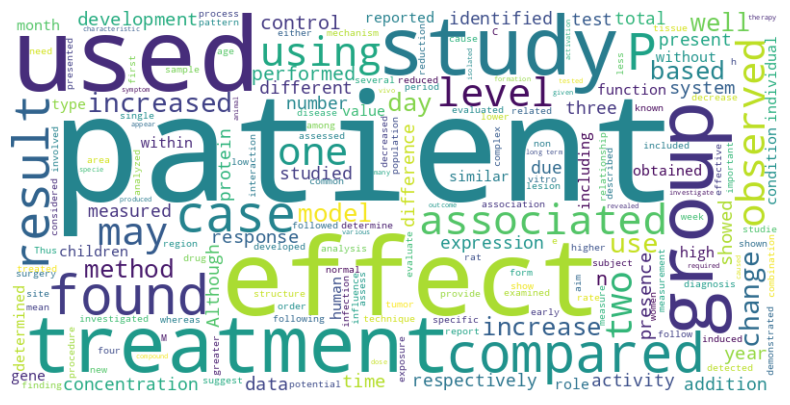

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Example text dataset
text = ' '.join(df.sample(frac=0.0267, random_state=23)['output'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Plot the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
import pyLDAvis.gensim_models
from gensim import models
from gensim.corpora import Dictionary
import pyLDAvis.gensim

# Concatenate all text entries into a single string
text = ' '.join(df.sample(frac=0.0267, random_state=23)['output'])

# Tokenize the text into individual words
tokens = nltk.word_tokenize(text)

# Create a Gensim Dictionary
dictionary = Dictionary([tokens])

# Create a Gensim Corpus
corpus = [dictionary.doc2bow(tokens)]

# Define the number of topics for LDA
num_topics = 7

# Create and fit the LDA model
lda_model = models.LdaModel(corpus, id2word=dictionary, num_topics=num_topics, random_state=23)

# Visualize the topics
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(vis_data)


# FineTuning

In [ ]:
from transformers.integrations import NeptuneCallback

In [ ]:
df = pd.read_csv("data.csv")
print(f"Size: {len(df)}")
df.head()

Size: 300513


,Unnamed: 0,prompt,output
0,0,The orthogonal character of stationary phases ...,A database of system constants for 32 open-tub...
1,1,Comparative performance of an adaptive directi...,The amplification outcomes of two hearing aid ...
2,2,Reliability and concurrent validity of a Smart...,Traditional methods of assessing joint range o...
3,3,Activation of the cation channel TRPM3 in peri...,The Transient Receptor Potential Melastatin 3 ...
4,4,[Preoperative low-dose-rate versus high-dose-r...,In women with stage IB (FIGO) carcinoma of the...


In [ ]:
df.drop(df.columns[0], axis=1, inplace=True)

In [ ]:
MODEL_NAME = "tiiuae/falcon-7b"

## Implementing BitsAndBytesConfig

In [ ]:
bnb_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4",
    bnb_4bit_compute_dtype=torch.bfloat16
)

model = AutoModelForCausalLM.from_pretrained(
    MODEL_NAME,
    device_map="auto",
    trust_remote_code=True,
    quantization_config=bnb_config,)

tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
tokenizer.pad_token = tokenizer.eos_token

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ in <cell line: 8>:8                                                                              │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/models/auto/auto_factory.py:479 in          │
│ from_pretrained                                                                                  │
│                                                                                                  │
│   476 │   │   │   │   class_ref, pretrained_model_name_or_path, **hub_kwargs, **kwargs           │
│   477 │   │   │   )                                                                              │
│   478 │   │   │   _ = hub_kwargs.pop("code_revision", None)                                      │
│ ❱ 479 │   │   │   return model_class.from_pretrained(                                            │
│   480 │   │   │   │   pretrained_model_name_or_path, *model_args, config=config, **hub_kwargs,   │
│   481 │   │   │   )                                                                              │
│   482 │   │   elif type(config) in cls._model_mapping.keys():                                    │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:2874 in from_pretrained   │
│                                                                                                  │
│   2871 │   │   │   │   mismatched_keys,                                                          │
│   2872 │   │   │   │   offload_index,                                                            │
│   2873 │   │   │   │   error_msgs,                                                               │
│ ❱ 2874 │   │   │   ) = cls._load_pretrained_model(                                               │
│   2875 │   │   │   │   model,                                                                    │
│   2876 │   │   │   │   state_dict,                                                               │
│   2877 │   │   │   │   loaded_state_dict_keys,  # XXX: rename?                                   │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:3220 in                   │
│ _load_pretrained_model                                                                           │
│                                                                                                  │
│   3217 │   │   │   │   )                                                                         │
│   3218 │   │   │   │                                                                             │
│   3219 │   │   │   │   if low_cpu_mem_usage:                                                     │
│ ❱ 3220 │   │   │   │   │   new_error_msgs, offload_index, state_dict_index = _load_state_dict_i  │
│   3221 │   │   │   │   │   │   model_to_load,                                                    │
│   3222 │   │   │   │   │   │   state_dict,                                                       │
│   3223 │   │   │   │   │   │   loaded_keys,                                                      │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/transformers/modeling_utils.py:675 in                    │
│ _load_state_dict_into_meta_model                                                                 │
│                                                                                                  │
│    672 │   │   │   │   if "dtype" in list(inspect.signature(set_module_tensor_to_device).parame  │
│    673 │   │   │   │   │   set_module_kwargs["dtype"] = tor

In [ ]:
def print_trainable_parameters(model):
    """
        Prints the number of trainable parameters in the model.
    """
    trainable_params = 0
    all_param = 0
    for _, param in model.named_parameters():
        all_param += param.numel()
        if param. requires_grad:
            trainable_params += param. numel ()

    print(f"trainable params: {trainable_params}|| all params: {all_param} trainable%: {100*trainable_params/all_param}")

In [ ]:
model.gradient_checkpointing_enable()
model = prepare_model_for_kbit_training(model)

## Implementing QLoRA

In [ ]:
config = LoraConfig(r=16,
                    lora_alpha=32,
                    target_modules=["query_key_value"],
                    lora_dropout=0.05,
                    bias="none",
                    task_type="CAUSAL_LM")

model=get_peft_model(model, config)
print_trainable_parameters(model)

In [ ]:
df.iloc[0].prompt

In [ ]:
prompt = f"""
<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates.

<output>:
""". strip ()
print(prompt)

In [ ]:
generation_config = model.generation_config
generation_config.max_new_tokens= 200
generation_config.temperature = 0.7
generation_config.top_p = 0.7
generation_config.num_return_sequences = 1
generation_config.pad_token_id = tokenizer.eos_token_id
generation_config.eostoken_id = tokenizer.eos_token_id

In [ ]:
# %%time
# device = "cuda:0"

# encoding = tokenizer(prompt, return_tensors="pt").to(device)

# with torch.inference_mode():
#   outputs = model.generate(
#   input_ids = encoding.input_ids,
#   attention_mask = encoding.attention_mask,
#   generation_config=generation_config,
#   )

# print(tokenizer.decode(outputs[0], skip_special_tokens=True))

<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<output>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<output>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<output>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<output>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase
CPU times: user 4min 10s, sys: 361 ms, total: 4min 10s
Wall time: 4min 13s


## Dataloader

In [ ]:
from datasets import Dataset

data = Dataset.from_pandas(df)
data

In [ ]:
def generate_prompt(data_point):
  return f"""
    <prompt>: {data_point["prompt"]}
    <assistant>: {data_point["output"]}
      """.strip()

def generate_and_tokenize_prompt (data_point):
  full_prompt = generate_prompt(data_point)
  tokenized_full_prompt = tokenizer(full_prompt, padding=True, truncation=True)
  return tokenized_full_prompt

In [ ]:
data = data.shuffle().map(generate_and_tokenize_prompt)
data

### Logging

In [ ]:
import neptune

run = neptune.init_run(
    project="nielspace/medcon-7b",
    api_token="eyJhcGlfYWRkcmVzcyI6Imh0dHBzOi8vYXBwLm5lcHR1bmUuYWkiLCJhcGlfdXJsIjoiaHR0cHM6Ly9hcHAubmVwdHVuZS5haSIsImFwaV9rZXkiOiJkYjRhYzI0Ny0zZjBmLTQ3YjYtOTY0Yi05ZTQ4ODM3YzE0YWEifQ==",
)

neptune_callback = NeptuneCallback(
    run=run,
    log_checkpoints=None,
)



# Training

In [ ]:
OUTPUT_DIR = 'experiment-falcon7b'
training_args = transformers.TrainingArguments(
    per_device_train_batch_size=1,
    gradient_accumulation_steps=4,
    num_train_epochs=10,
    learning_rate=2e-4,
    fp16=True,
    save_total_limit=3,
    logging_steps=1,
    max_steps=80,
    optim="paged_adamw_8bit",
    lr_scheduler_type="cosine",
    warmup_ratio=0.05,
    output_dir=OUTPUT_DIR,
    report_to="none")

trainer = transformers.Trainer(
    model=model,
    train_dataset=data,
    args=training_args,
    data_collator=transformers.DataCollatorForLanguageModeling(tokenizer, mlm=False),
    callbacks=[neptune_callback]
    )

model.config.use_cache = False

trainer.train()

In [ ]:
model.save_pretrained("trained-model")

# Inference

In [ ]:
prompt = f"""
<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates.

<output>:
""". strip ()

device = "cuda:0"

encoding = tokenizer(prompt, return_tensors="pt").to(device)

generation_config.use_cache = False

with torch.inference_mode():
  outputs = model.generate(
  input_ids = encoding.input_ids,
  attention_mask = encoding.attention_mask,
  generation_config=generation_config,
  use_cache=False
  )

print(tokenizer.decode(outputs[0], skip_special_tokens=True))

<text>: EM-field effect upon properties of NADPH-cytochrome P-450 reductase with model substrates. 

<output>: NADPH-cytochrome P-450 reductase (EC 1.6.4.1) is a flavoprotein that catalyzes the reduction of NADPH to NADP+ in the presence of cytochrome P-450. The enzyme is a member of the heme-containing monooxygenase superfamily. The enzyme is a tetramer of 55 kDa subunits. The enzyme is a member of the heme-containing monooxygenase superfamily. The enzyme is a tetramer of 55 kDa subunits. The enzyme is a member of the heme-containing monooxygenase superfamily. The enzyme is a tetramer of 55 kDa subunits. The enzyme is a member of the heme-containing monooxygenase superfamily. The enzyme is a tetramer of 55 kDa subunits. The enzyme is a member of the heme-containing monooxygenase superfamily. The enzyme is a
CPU times: user 4min 13s, sys: 245 ms, total: 4min 13s
Wall time: 4min 15s
